In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#data_path = r"\\wsl.localhost\Ubuntu\home\jarryd\project\cms-cls-tea\evaluation\output_evaluation\conc_versus_x.csv"
# data_path = './data/06_01_test.csv'
data_path = "./output_evaluation/conc_versus_x.csv"
data = pd.read_csv(data_path, names=['distance_from_margin', 'conc_slice'])

In [8]:
data

,distance_from_margin,conc_slice
0,0.000000,0.001244
1,0.063492,0.002485
2,0.126984,0.003720
3,0.190476,0.004946
4,0.253968,0.006161
...,...,...
59,3.746032,0.006161
60,3.809524,0.004946
61,3.873016,0.003720
62,3.936508,0.002485


Text(0.5, 1.0, 'Distance from Margin vs Concentration Slice')

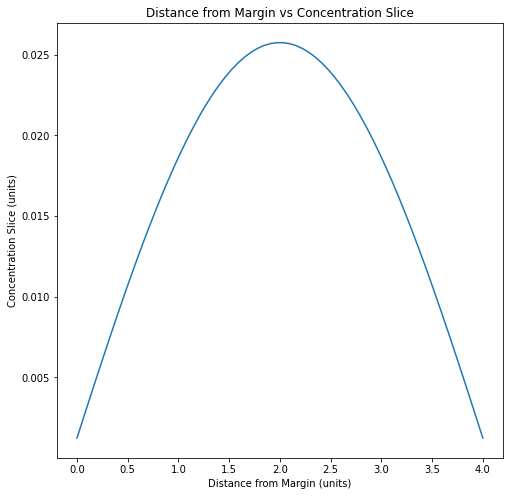

In [9]:
#data.plot('distance_from_margin', 'conc_slice')

plt.figure(figsize=(8,8))
plt.plot(data['distance_from_margin'], data['conc_slice'])
plt.xlabel('Distance from Margin (units)')
plt.ylabel('Concentration Slice (units)')
plt.title('Distance from Margin vs Concentration Slice')